In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
whole_data = np.load('../Data_Preprocessing/output/5174_Dataset/training_data.npy')
whole_labels_flatten = np.load('../Data_Preprocessing/output/5174_Dataset/training_dists_flatten.npy')

In [3]:
print(whole_data.shape)
print(whole_labels_flatten.shape)

(5174, 100, 1000, 1)
(5174, 4950)


## Plot before shuffling (5174*100, 1000)

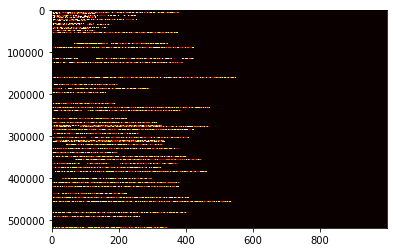

In [4]:
whole_data_before_shuffle = whole_data.reshape((whole_data.shape[0]*100, 1000))
plt.imshow(whole_data_before_shuffle, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

## Shuffle each input sample (5174*100, 1000)

Shuffle the **rows and the columns (100, 1000)** for each sample

In [5]:
for i in range(whole_data.shape[0]):
    shuffle_indices_100 = random.sample(range(0, 100), 100)
    shuffle_indices_1000 = random.sample(range(0, 1000), 1000)
    tmp = whole_data[i][shuffle_indices_100]
    tmp = tmp[:, shuffle_indices_1000]
    whole_data[i] = tmp

## Plot after shuffling (5174*100, 1000)

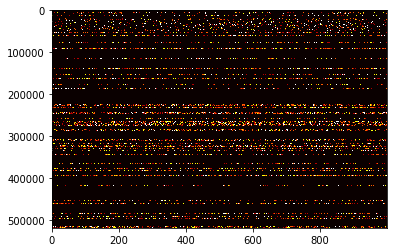

In [6]:
whole_data_after_shuffle = whole_data.reshape((whole_data.shape[0]*100, 1000))
plt.imshow(whole_data_after_shuffle, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

## Training / Testing Dataset Partition (random seed 30)
Shuffle the order of samples

In [7]:
samples_count = whole_data.shape[0]

train_size = math.floor(0.85*whole_data.shape[0])

random.seed(30)

shuffle_indices = random.sample(range(0, samples_count), samples_count)

print(len(np.unique(shuffle_indices)))

5174


In [8]:
indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

In [9]:
print("######## Training Data ########")
X_train = whole_data[indices_train,:]
Y_train_flatten = whole_labels_flatten[indices_train]

print("######## Validation Data ########")
X_test = whole_data[indices_test,:]
Y_test_flatten = whole_labels_flatten[indices_test]

print('X_train.shape : ', X_train.shape)

print('Y_train_flatten.shape : ', Y_train_flatten.shape)
print('Y_test_flatten.shape : ', Y_test_flatten.shape)# Training Testing Dataset Partition

######## Training Data ########
######## Validation Data ########
X_train.shape :  (4397, 100, 1000, 1)
Y_train_flatten.shape :  (4397, 4950)
Y_test_flatten.shape :  (777, 4950)


## Plot  for X_train

In [10]:
X_train_shuffle = X_train.reshape((X_train.shape[0]*100, 1000))

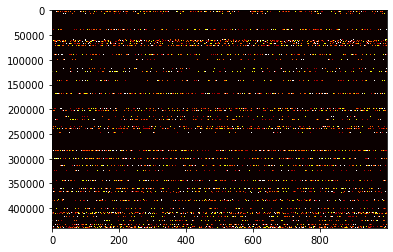

In [11]:
plt.imshow(X_train_shuffle, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

## Plot for X_test

In [12]:
X_test_shuffle = X_test.reshape((X_test.shape[0]*100, 1000))

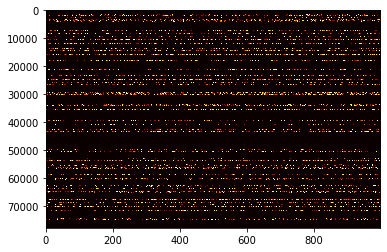

In [13]:
plt.imshow(X_test_shuffle, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

In [14]:
np.save('./output/5174_Dataset/X_train_seed_30.npy', X_train)
np.save('./output/5174_Dataset/Y_train_flatten_seed_30.npy', Y_train_flatten)

np.save('./output/5174_Dataset/X_test_seed_30.npy', X_test)
np.save('./output/5174_Dataset/Y_test_flatten_seed_30.npy', Y_test_flatten)